<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2018


En este notebook se aborda el tema de aprendizaje de máquina para clasificación binaria no-lineal utilizando una red neuronal simple.
1. forward-propagation.
2. backward-propagation.

<hr>
# 1. El problema XOR

<img src='res/shallow_nn/xor_problem.png'>

In [34]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

<hr>

# 1. Algunas utilidades

In [32]:
def generate_data(data_type, noise=0.2):
    """
    Generate a binary dataset with distribution data_type

    Arguments:
    data_type -- distribution of dataset {moons,circles,blobs}

    Returns:
    X -- features
    Y -- labels
    """ 
    np.random.seed(0)
    if data_type == 'moons':
        X, Y = datasets.make_moons(200, noise=noise)
    elif data_type == 'circles':
        X, Y = sklearn.datasets.make_circles(200, noise=noise)
    elif data_type == 'blobs':
        X, Y = sklearn.datasets.make_blobs(centers=2, cluster_std=noise)
    return X, Y

def visualize_lr(parameters, X, Y):
    X = X.T
    
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = predict_multilayer(parameters, np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]
    plt.scatter(X[:,0], X[:,1], color=color)
    
    plt.show()

<hr>

# 2. Funciones principales de la red neuronal

In [ ]:
def linear_activation(W, b, a):
    z = np.dot(W,a) + b
    
    return z

In [ ]:
def sigmoid(z):
    '''
    Returns sigmoid activation for array z
    '''
    a = 1. / (1. + np.exp(-z)) 
    
    return a 

In [ ]:
def d_sigmoid(z):
    return sigmoid(z) * (1. - sigmoid(z))

In [ ]:
def loss(y, a):
    return -(y * np.log(a) + (1-y) * np.log(1-a))

In [ ]:
def cost(logloss):
    return np.mean(logloss)

### - Dataset XOR

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0, 1, 1, 0]])

nx, m = X.T.shape
color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

X = X.T

<hr>

# 3. Inicialización de los parámetros de la red neuronal.

Creemos una red neuronal de dos neuronas en la capa 1 y una neurona en la capa 2 (salida).

In [ ]:
W1 = np.random.rand(2,2)
b1 = np.zeros([2,1])

W2 = np.random.rand(1, 2)
b2 = 0

print(W1, b1)
print(W2, b2)

<hr>

# 4. Entrenamiento de la red neuronal.

In [ ]:
'''
Metaparameters initialization
'''
num_epochs = 10000
learning_rate = 0.5

error_array = np.zeros([num_epochs])#lo utilizaremos para plotear el error

'''
Gradient descent
'''
for i in range(num_epochs): #2000 iteraciones del descenso del gradiente
    '''
    Forward Propagation
    '''
    Z1 = linear_activation(W1, b1, X)
    A1 = sigmoid(Z1)

    Z2 = linear_activation(W2, b2, A1)
    A2 = sigmoid(Z2)

    '''
    Backward Propagation
    '''
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.multiply(np.dot(W2.T, dZ2), d_sigmoid(Z1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    '''
    Parameters Update
    '''
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2

    '''
    Cost estimation
    '''
    J = cost(loss(Y,A2))
    error_array[i] = J
    
    
    if(i%1000 == 0):
        print("costo -- iteracion ", i, ": ", J)
        
print("parametros actualizados: ", parameters)

'''
Testing
'''
print("Predicciones del clasificador: ", predict_multilayer(parameters,X))

'''
Visualizacion del error por epoca
'''
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,num_epochs-1, num_epochs), error_array)
plt.xlabel("numero de epocas")
plt.ylabel("error: "+r'$J$')
plt.show()

### - Visualizacion del resultado

In [ ]:
visualize_lr(parameters, X, Y)

<hr>

# Trabajemos

## Ejercicio 1
1. Modificar la red neuronal anterior para que tenga 3 neuronas en la capa 1, 2 neuronas en la capa 2 y una neurona en la capa 3.
2. Modificar el código para el forward propagation.
3. Modificar el código para el backward propagation.
4. Entrenar la nueva red neuronal con el problema XOR y comparar resultados.

## Ejercicio 2
Entrenar la nueva red para el dataset 'moons' y validar resultados.

In [66]:
X, Y = generate_data('moons', noise=0.1)

nx, m = X.T.shape
color = ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]

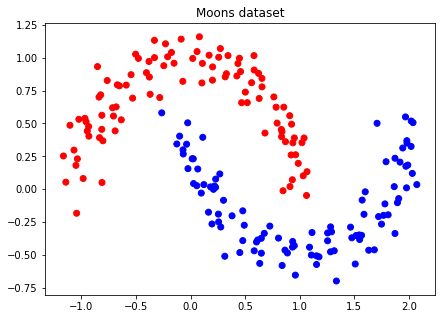

In [67]:
plt.figure(figsize=(7,5))
plt.title("Moons dataset")
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

In [68]:
X = X.T #Transponemos el dataset para que quede de tamanio nx, m